In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
df = pd.read_csv('Crime_Data_from_2010_to_Present.csv')

In [108]:
df["DATE OCC"] = pd.to_datetime(df['DATE OCC'])
df['YEAR']=df["DATE OCC"].dt.year
df['MONTH']=df['DATE OCC'].dt.month
df['Day_of_Week']=df['DATE OCC'].apply(lambda x:x.weekday())
df['HOUR']=df['TIME OCC']//100


In [116]:
df[df["Crm Cd"] ==235]

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,YEAR,MONTH,Day_of_Week,HOUR
219,100101039,06/14/2010 12:00:00 AM,2010-06-14,1645,1,Central,119,1,235,CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT,...,NaN,NaN,900 N VIGNES ST,NaN,34.0566,-118.2319,2010,6,0,16
377,100101521,10/18/2010 12:00:00 AM,2010-10-18,600,1,Central,159,1,235,CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT,...,NaN,NaN,7TH,MILL,34.0347,-118.2345,2010,10,0,6
1983,100108947,04/06/2010 12:00:00 AM,2010-04-06,700,1,Central,118,1,235,CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT,...,NaN,NaN,1400 N MAGDALENA ST,NaN,34.0642,-118.2301,2010,4,1,7
6942,100200512,01/07/2010 12:00:00 AM,2010-01-06,2000,2,Rampart,216,1,235,CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT,...,NaN,NaN,2400 BELLEVUE AV,NaN,34.0746,-118.2707,2010,1,2,20
8279,100207055,02/26/2010 12:00:00 AM,2010-02-20,800,2,Rampart,211,1,235,CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT,...,NaN,NaN,500 N ALEXANDRIA AV,NaN,34.0790,-118.2980,2010,2,5,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2074299,192117010,10/11/2019 12:00:00 AM,2019-10-11,800,21,Topanga,2137,1,235,CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT,...,NaN,NaN,7300 VARIEL AV,NaN,34.2029,-118.5929,2019,10,4,8
2076163,191815628,07/08/2019 12:00:00 AM,2019-07-02,2200,18,Southeast,1846,1,235,CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT,...,NaN,NaN,11400 SUCCESS AV,NaN,33.9306,-118.2493,2019,7,1,22
2078863,191015513,09/11/2019 12:00:00 AM,2019-09-10,1814,10,West Valley,1099,1,235,CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT,...,NaN,NaN,15900 VALLEY WOOD RD,NaN,34.1373,-118.4797,2019,9,1,18
2079509,190200621,06/20/2019 12:00:00 AM,2019-06-06,1200,2,Rampart,236,1,235,CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT,...,NaN,NaN,2000 W 3RD ST,NaN,34.0657,-118.2680,2019,6,3,12


## Question:
- What is the relation between cumulative crime number and time of the crime?
- What is the relation between crimes and the location?
- Is there any relation between crime victims and income? If so, do these relations vary with respect to different type of crimes?
- Do some types of crime correlated with specific type of crime?

# III. Visualization and Analysis
<br>

## a. Crime Number vs. Time
First, we generated the histogram of cumulative crime number in the database annually and monthly, in the first row of plots. <br>
Since some years have 356 days while some have 366 and the data is cumulated to the end of November,2019, we normalized the anually crime number by the day number of year, respectively. Similarly, there are different day numebr in each month, we also normalized the count by the day number of months.

In [83]:
y=df.groupby("YEAR").count()['DR_NO']
y_d=[365,365,366,365,365,365,366,365,365,334]
anual=y/y_d
m=df.groupby("MONTH").count()['DR_NO']
m_d=[31,28,31,30,31,30,31,31,30,31,30,28]
monthly=m/m_d

From the observation annually and monthly plot, the 2016, 2017, and 2018 year have higher daily crime number while the crime number seperated by month doesn't have noticable difference.<br>
Thus, we try to compare the crime number with respect to the day of week and the hour of day.<br>
(Note: the 0 to 6 indicate monday to sundau, ie, 4 is Friday)<br>
From the second row of plots, we can tell that Friday usually have higher crime number and the 12 in the noon have significant higher crime number than other time of day.

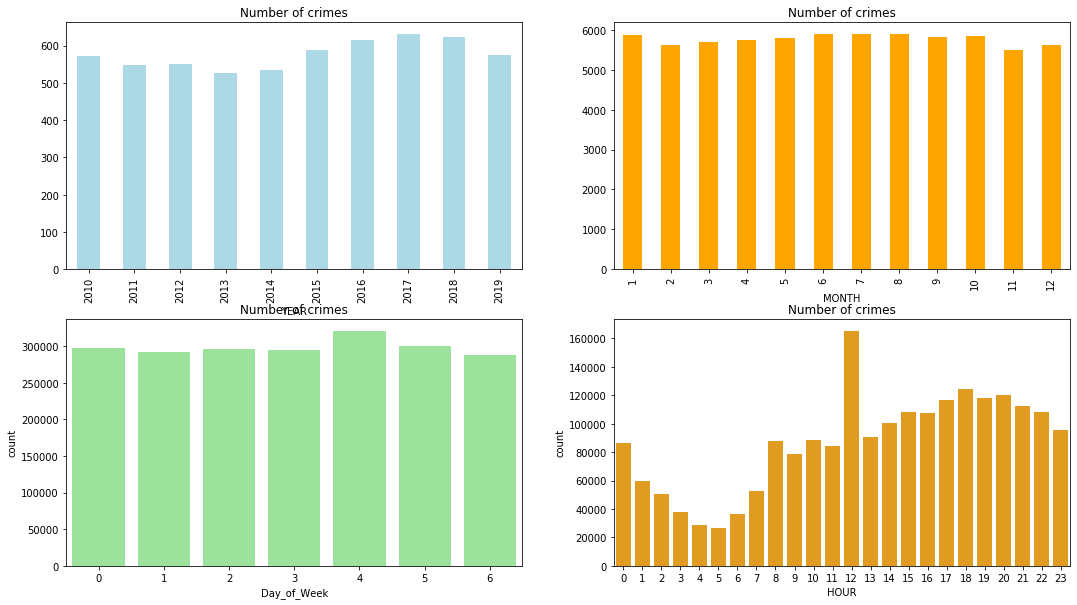

In [106]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (18, 10))
anual.plot(kind='bar',color='lightblue', ax = axes[0,0] )
axes[0,0].set_title("Number of crimes")
sns.countplot(df["Day_of_Week"], color='lightgreen', ax = axes[1,0])
axes[1,0].set_title("Number of crimes")
monthly.plot(kind='bar', color = 'orange', ax = axes[0,1])
axes[0,1].set_title("Number of crimes")
sns.countplot(df["HOUR"], color = 'orange', ax = axes[1,1])
axes[1,1].set_title("Number of crimes");

Since the day of week and hour of day both have some infomation that we interested in, we further generated a heatmap with repect to both time types and it shows the results coincided with previous plots, that the Friday have generally higher crime number and the most dark part in the graph, which indicate the highest crime number is 12:00 Friday, and the second highest is 12:00 Monday.

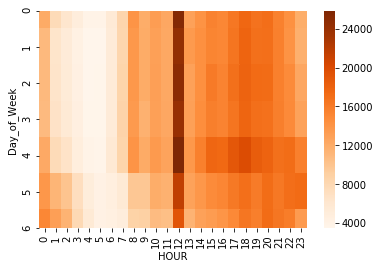

In [99]:
sns.heatmap(pd.pivot_table(data = df, index = "Day_of_Week", 
                              columns = "HOUR", values = "DR_NO", aggfunc = 'count'), 
               cmap = 'Oranges');

The main reason we want to analysis the relation of crime with other factors is that, we try to get some conclusive suggestion to help people aviod crime and since there are too many type of crime, only a few would jeoperdize our personal safety, we focus our analysis on those type of crime first.<br>
In the heatmap of criminal homicide, we notice that the most frequent time is Sauterday midnight. Generally, weekends have more number of homicide comparing with workdays, espcally in the night.<br>
In the heatmap for crime with hand gun, it shows that the Sautardy 23:00 to Sunday 1:00 are the period that has most frequent crime with hand gun and generally more crime with hand gun in the night comparing with daytime.

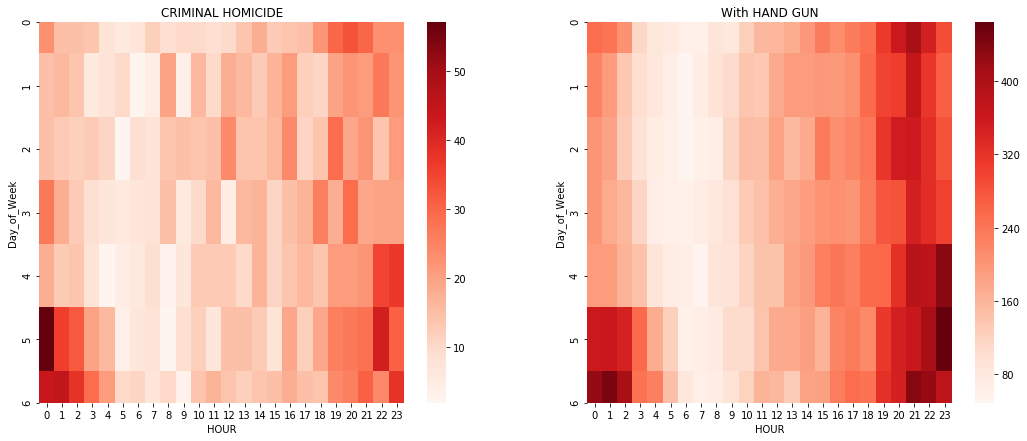

In [92]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 7))
sns.heatmap(pd.pivot_table(data = df[df["Crm Cd"] ==110], index = "Day_of_Week", 
                              columns = "HOUR", values = "Crm Cd", aggfunc = 'count'), cmap = 'Reds', ax = axes[0])
axes[0].set_title("CRIMINAL HOMICIDE")
sns.heatmap(pd.pivot_table(data = df[df["Weapon Used Cd"] == 102], index = "Day_of_Week", 
                              columns = "HOUR", values = "Weapon Used Cd", aggfunc = 'count'), cmap = 'Reds', ax = axes[1])
axes[1].set_title("With HAND GUN");

# IV. Correlations
<br>

## a. Crime vs. Crime correlation

Given 141 types of crime, we selected four frequent types: Theft, Robbery, Rape, and Children Abuse.<br>
- Theft:<br>
    * Code: 442 -- SHOPLIFTING - PETTY THEFT 
    * Code: 331 -- THEFT FROM MOTOR VEHICLE - GRAND
    * Code: 420 -- THEFT FROM MOTOR VEHICLE - PETTY
    * Code: 440 -- THEFT PLAIN
<br><br>
- Robbery: Code: 210<br>
<br>
- Murder: Code: 110<br>
<br>
- Children Abuse:<br>
    * Code: 627 -- CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT
    * Code: 235 -- CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT	

In [125]:
crimeCodeDict = df[["Crm Cd","Crm Cd Desc"]].set_index("Crm Cd").to_dict()
keys = crimeCodeDict['Crm Cd Desc'].keys()
print('The number of crime type is', len(keys))

The number of crime type is 141


In [117]:
theaf=set([442,331,420,440])
rob=210
murder=110
ch_abuse=set([627,235])
filt=set([442,331,420,440,210,121,110,627,235,943])

We first plot the murder

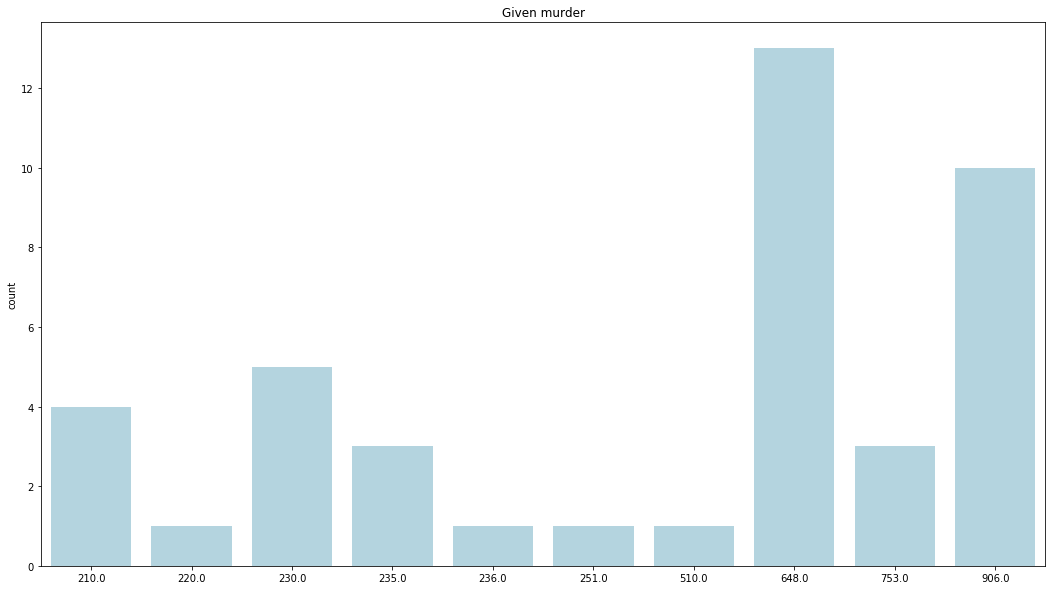

In [118]:
murd=df[df['Crm Cd']==murder]
test=murd2[murd2.isin(keys)]
fig, axes = plt.subplots(figsize = (18, 10))
murd2=(murd['Crm Cd 2'].append(murd['Crm Cd 3'])).append(murd['Crm Cd 4'])
murd2=murd2[murd2.isin(keys)]
# 210 220 230 235 236 251 510 648 753 906 979
# 210 ROBBERY, 
# 220 ATTEMPTED ROBBERY
# 230 ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT, 
# 235 CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULTARSON,
sns.countplot(test, color='lightblue' )
axes.set_title("Given murder");

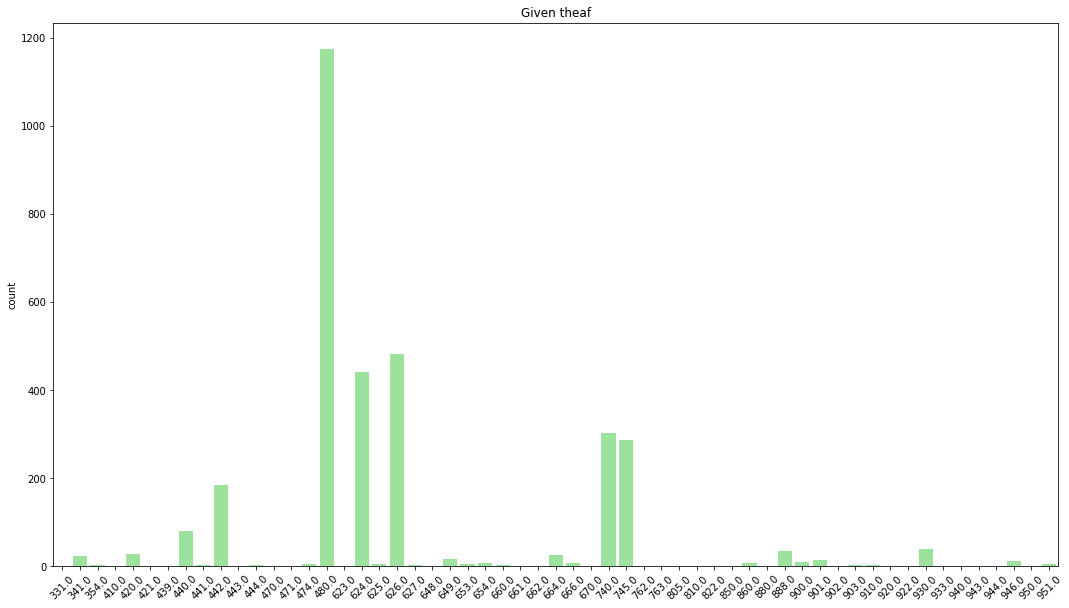

In [119]:
thee=df[df['Crm Cd'].isin(theaf)]

fig, axes = plt.subplots(figsize = (18, 10))

thee2=(thee['Crm Cd 2'].append(thee['Crm Cd 3'])).append(thee['Crm Cd 4'])
thee2=thee2[thee2.isin(keys)]
# 210 220 230 235 236 251 510 648 753 906 979
# 210 ROBBERY, 
# 220 ATTEMPTED ROBBERY
# 230 ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT, 
# 235 CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULTARSON,
sns.countplot(thee2, color='lightgreen')
axes.set_title("Given theaf")
plt.xticks(rotation=45);

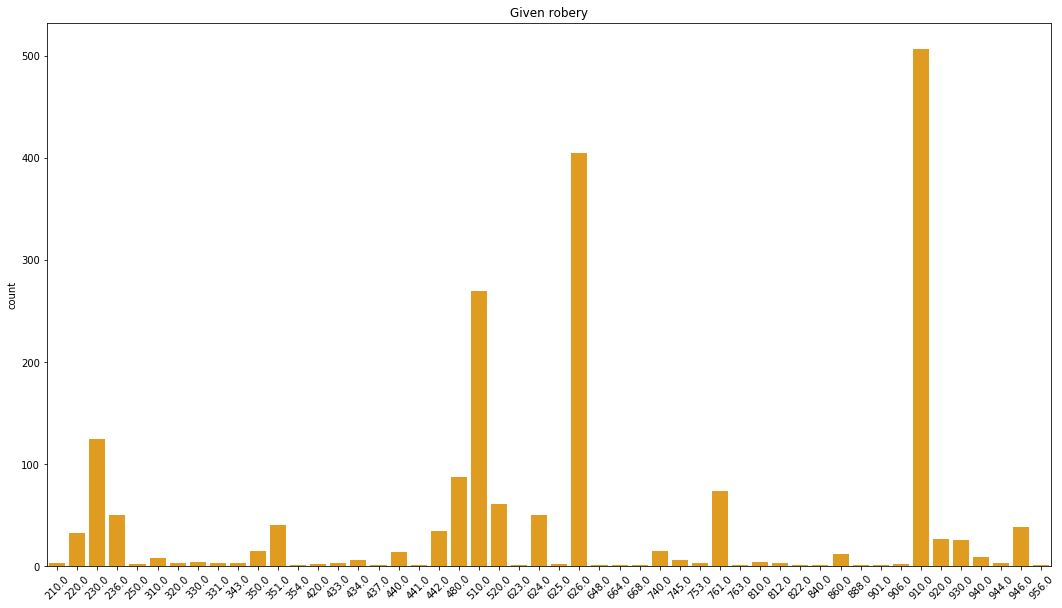

In [120]:
robery=df[df['Crm Cd']==rob]
fig, axes = plt.subplots(figsize = (18, 10))
robery2=(robery['Crm Cd 2'].append(robery['Crm Cd 3'])).append(robery['Crm Cd 4'])
robery2=robery2[robery2.isin(keys)]
# 210 220 230 235 236 251 510 648 753 906 979
# 210 ROBBERY, 
# 220 ATTEMPTED ROBBERY
# 230 ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT, 
# 235 CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULTARSON,
sns.countplot(robery2, color = 'orange')
axes.set_title("Given robery")
plt.xticks(rotation=45);

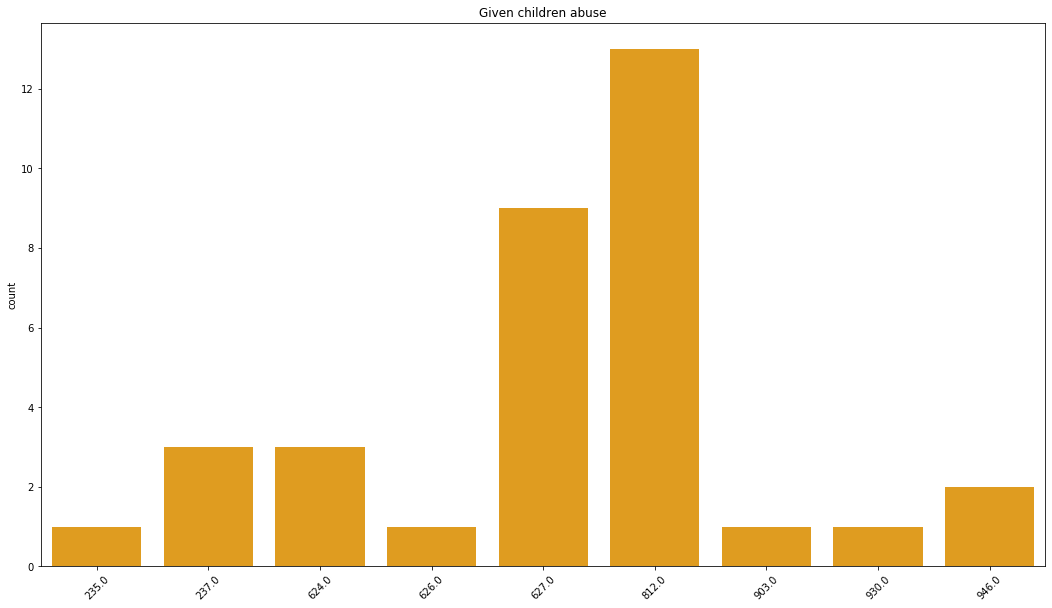

In [121]:
child=df[df['Crm Cd'].isin(ch_abuse)]
fig, axes = plt.subplots(figsize = (18, 10))

child2=(child['Crm Cd 2'].append(child['Crm Cd 3'])).append(child['Crm Cd 4'])
child2=child2[child2.isin(keys)]
# 210 220 230 235 236 251 510 648 753 906 979
# 210 ROBBERY, 
# 220 ATTEMPTED ROBBERY
# 230 ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT, 
# 235 CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULTARSON,

sns.countplot(child2, color = 'orange')
axes.set_title("Given children abuse")
plt.xticks(rotation=45);

In [122]:
combine= pd.read_csv('combine.csv')
combine=combine.drop(columns='Unnamed: 0')
combine=combine.drop(columns='Unnamed: 0.1')

In [123]:
tax_income = pd.read_csv("tax_income.csv")
tax_income_2014 = tax_income[tax_income["Taxable Year"] == 2014]
merged = pd.merge(left=combine,right=tax_income_2014, left_on="ZIP_CODE", right_on='Zip Code',how="inner")
merged.head()
merged['Total Tax Liability']=merged['Total Tax Liability']//1000

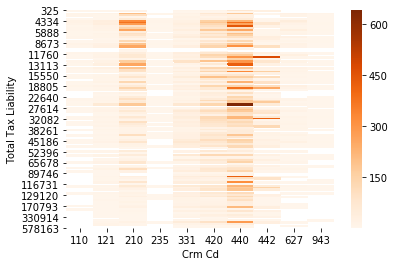

In [124]:
sns.heatmap(pd.pivot_table(data = merged, index = "Total Tax Liability", 
                              columns = "Crm Cd", values = "DR_NO", aggfunc = 'count'), 
               cmap = 'Oranges');